In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset=pd.read_csv('Classified Data',index_col=0)
print(dataset)

          WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0    0.913917  1.162073  0.567946  0.755464  0.780862  0.352608  0.759697   
1    0.635632  1.003722  0.535342  0.825645  0.924109  0.648450  0.675334   
2    0.721360  1.201493  0.921990  0.855595  1.526629  0.720781  1.626351   
3    1.234204  1.386726  0.653046  0.825624  1.142504  0.875128  1.409708   
4    1.279491  0.949750  0.627280  0.668976  1.232537  0.703727  1.115596   
..        ...       ...       ...       ...       ...       ...       ...   
995  1.010953  1.034006  0.853116  0.622460  1.036610  0.586240  0.746811   
996  0.575529  0.955786  0.941835  0.792882  1.414277  1.269540  1.055928   
997  1.135470  0.982462  0.781905  0.916738  0.901031  0.884738  0.386802   
998  1.084894  0.861769  0.407158  0.665696  1.608612  0.943859  0.855806   
999  0.837460  0.961184  0.417006  0.799784  0.934399  0.424762  0.778234   

          PJF       HQE       NXJ  TARGET CLASS  
0    0.643798  0.879422  

In [7]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_x.fit(dataset.drop('TARGET CLASS', axis=1))
scaled_features = sc_x.transform(dataset.drop('TARGET CLASS',axis=1))

# Convert data into data frame
dataset_updated = pd.DataFrame(scaled_features, columns = dataset.columns[:-1])
print(dataset_updated.head())

        WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0 -0.123542  0.185907 -0.913431  0.319629 -1.033637 -2.308375 -0.798951   
1 -1.084836 -0.430348 -1.025313  0.625388 -0.444847 -1.152706 -1.129797   
2 -0.788702  0.339318  0.301511  0.755873  2.031693 -0.870156  2.599818   
3  0.982841  1.060193 -0.621399  0.625299  0.452820 -0.267220  1.750208   
4  1.139275 -0.640392 -0.709819 -0.057175  0.822886 -0.936773  0.596782   

        PJF       HQE       NXJ  
0 -1.482368 -0.949719 -0.643314  
1 -0.202240 -1.828051  0.636759  
2  0.285707 -0.682494 -0.377850  
3  1.066491  1.241325 -1.026987  
4 -1.472352  1.040772  0.276510  


In [8]:
# We have converted data into normalized form


In [16]:
# Now train test split one..
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(scaled_features, dataset['TARGET CLASS'],test_size=0.3,random_state=42)

from sklearn.neighbors import KNeighborsClassifier
Obj = KNeighborsClassifier(n_neighbors = 11)
Obj.fit(xtrain,ytrain)
pred = Obj.predict(xtest)

print(ytest,pred)

521    0
737    1
740    1
660    1
411    0
      ..
468    1
935    1
428    0
7      0
155    0
Name: TARGET CLASS, Length: 300, dtype: int64 [0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0
 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1
 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1
 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1
 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0
 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1
 1 0 0 0]


In [17]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(ytest,pred)
print(cm)
print(classification_report(ytest,pred))

[[135   7]
 [  8 150]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       142
           1       0.96      0.95      0.95       158

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [18]:
# How to find the best value of k


In [22]:
acc_rate=[]
for i in range(1,40):
    Obj = KNeighborsClassifier(n_neighbors = i)
    Obj.fit(xtrain,ytrain)
    pred_i = Obj.predict(xtest)error_rate=[]
for i in range(1,40):
    Obj = KNeighborsClassifier(n_neighbors = i)
    Obj.fit(xtrain,ytrain)
    pred_i = Obj.predict(xtest)
    error_rate.append(np.mean(pred_i !=ytest))
    acc_rate.append(1-np.mean(pred_i !=ytest))

In [27]:
error_rate=[]
for i in range(1,40):
    Obj = KNeighborsClassifier(n_neighbors = i)
    Obj.fit(xtrain,ytrain)
    pred_i = Obj.predict(xtest)
    error_rate.append(np.mean(pred_i !=ytest))

Text(0, 0.5, 'Accuracy Rate')

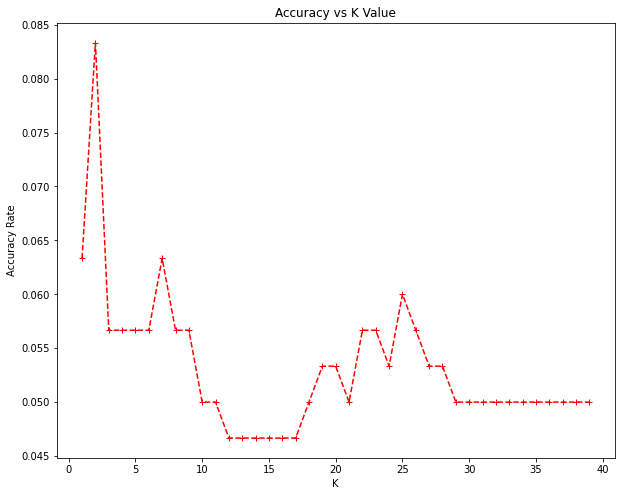

In [30]:
plt.figure(figsize=(10,8))
# plt.plot(range(1,40), error_rate, color='red',linestyle='dashed',marker='0',markerfo)
plt.plot(range(1,40), error_rate,color='red',linestyle='dashed',marker='+')
plt.title('Accuracy vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

# New Program

In [34]:
from sklearn.datasets import load_iris
import pandas as pd
import math
iris=load_iris()
X = iris.data[:,:4]
Y= iris.target



In [35]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [36]:
df['target'] = Y
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [37]:
# Method for Euclidian distance
def euclidian_distance(row1,row2):
    distance = 0.0
    for i in range(len(row)-1):
        distance += (row1[i] - row2[i])**2
    return math.sqrt(distance)

In [40]:
dataset = df.iloc[100:105,:].values
print(dataset)
row0= dataset[0]
for row in dataset:
    distance = euclidian_distance(row0,row)
    print(distance)

[[6.3 3.3 6.  2.5 2. ]
 [5.8 2.7 5.1 1.9 2. ]
 [7.1 3.  5.9 2.1 2. ]
 [6.3 2.9 5.6 1.8 2. ]
 [6.5 3.  5.8 2.2 2. ]]
0.0
1.3341664064126335
0.9486832980505134
0.9
0.5099019513592784


In [50]:
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist =  euclidian_distance(test_row,train_row)
        distances.append((train_row,dist))
#         print(distances)
#         print('check')
    distances.sort(key=lambda var: var[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

In [51]:
neighbors = get_neighbors(dataset, dataset[0],3)
for neighbor in neighbors:
    print(neighbor)

[6.3 3.3 6.  2.5 2. ]
[6.5 3.  5.8 2.2 2. ]
[6.3 2.9 5.6 1.8 2. ]


In [56]:
# We will make the prediction
def predict_classification(train,test_row,num_neighbors):
    neighbors = get_neighbors(train, test_row,num_neighbors)
#     print(neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

In [57]:
prediction = predict_classification(dataset, dataset[0],3)
print('Expected %d, Got %d. '%(dataset[0][-1],prediction))

Expected 2, Got 2. 


In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(pred,ytest)
acc*100